### **This Project aims to detect bank fraud using Time and Amount as independent variable.**
### **The outcome variable is a Binary Logistic variable, expected to have two exclusive forms: Zero(Not Fraud) or One(Fraud).**

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [41]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284806 rows and 31 columns


### drops duplicate rows

In [42]:
dfNEW=df.drop_duplicates(keep='first').copy()

In [43]:
nRow, nCol = dfNEW.shape
print(f'There are now {nRow} rows and {nCol} columns')

There are now 283725 rows and 31 columns


In [44]:
dfNEW=dfNEW[['Time','Amount','Class']]

In [45]:
dfNEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283725 entries, 0 to 284805
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283725 non-null  float64
 1   Amount  283725 non-null  float64
 2   Class   283725 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 8.7 MB


C:\Users\Victoria\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Victoria\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Victoria\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not lay

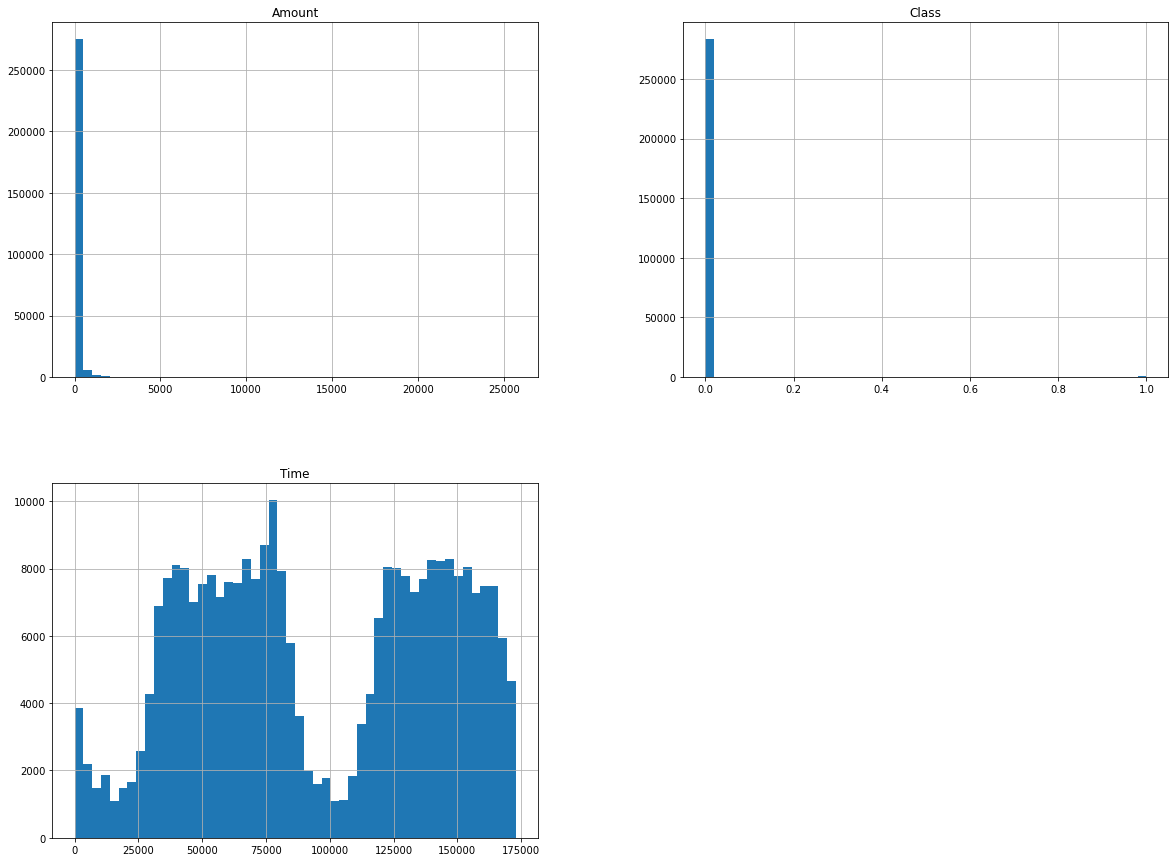

In [46]:
import matplotlib.pyplot as plt
dfNEW.hist(bins=50, figsize=(20,15))
plt.show()

In [47]:
Classgp=dfNEW.groupby('Class').size()
Classgp

Class
0    283252
1       473
dtype: int64

In [48]:
dfNEW.shape

(283725, 3)

In [49]:
dfNEWTRAIN=dfNEW[:200000]
dfNEWTRAIN.shape

(200000, 3)

In [50]:
dfNEWTRAIN.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [51]:
dfNEWTEST=dfNEW[200000:]
dfNEWTEST.shape

(83725, 3)

In [52]:
dfNEWTEST.head()

,Time,Amount,Class
200716,133546.0,4.85,0
200717,133547.0,12.49,0
200718,133547.0,0.11,0
200719,133548.0,9.98,0
200720,133548.0,10.59,0


### Statistical modelling

In [53]:
# Statistical modelling and Prediction through Statsmodel.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
model = smf.logit("Class ~ Amount + Time",dfNEWTRAIN)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.013296
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               200000
Model:                          Logit   Df Residuals:                   199997
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Mar 2024   Pseudo R-squ.:                0.007436
Time:                        12:53:03   Log-Likelihood:                -2659.1
converged:                       True   LL-Null:                       -2679.0
Covariance Type:            nonrobust   LLR p-value:                 2.230e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7120      0.109    -52.332      0.000      -5.926      -5.498
Amount         0.0002   8.64

In [54]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.007     
Dependent Variable: Class            AIC:              5324.2052 
Date:               2024-03-13 12:53 BIC:              5354.8234 
No. Observations:   200000           Log-Likelihood:   -2659.1   
Df Model:           2                LL-Null:          -2679.0   
Df Residuals:       199997           LLR p-value:      2.2299e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     11.0000                                      
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -5.7120    0.1092  -52.3317  0.0000  -5.9260  -5.4981
Amount        0.0002    0.0001    2.6597  0.0078   0.0001   0.0004
Time         -0.0000    0.0000   -5.8876  0.0000  -0.0000  -0.0000



In [55]:
print(result.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:                  Class
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Amount      4.208e-07    1.6e-07      2.637      0.008    1.08e-07    7.34e-07
Time       -1.708e-08   3.03e-09     -5.631      0.000    -2.3e-08   -1.11e-08


In [56]:
z, p = stats.normaltest(result.fittedvalues.values)
p

2.447093800965092e-298

In [57]:
dfNEWTEST_T=dfNEWTEST[['Time','Amount']]
dfNEWTESTCLASS=dfNEWTEST['Class']

In [58]:
# performing predictions on the test dataset 
dfNEWTEST['PREDClass'] = result.predict(dfNEWTEST_T)
prediction = list(map(round, dfNEWTEST['PREDClass']))
  
# comparing original and predicted values of y 
print('Actual values', list(dfNEWTESTCLASS.values)) 
print('Predictions :', prediction) 

C:\Users\Victoria\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Actual values [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [59]:
from sklearn.metrics import (confusion_matrix,  accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(dfNEWTESTCLASS, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(dfNEWTESTCLASS, prediction))

Confusion Matrix : 
 [[83619     0]
 [  106     0]]
Test accuracy =  0.9987339504329651
